<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Feature x1')

Text(0, 0.5, 'Feature x2')

Text(0.5, 1.0, 'Generated Data for Logistic Regression')

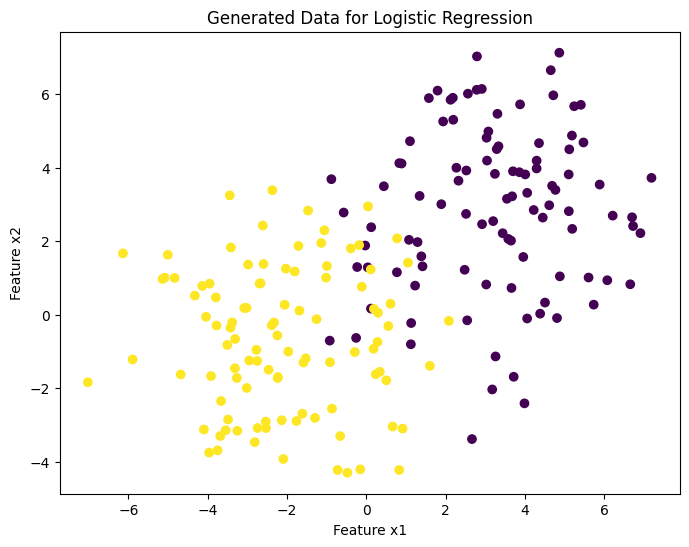

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(20)

# Number of data points for each class
num_points = 100

# Class 0 data
x0 = np.random.randn(num_points, 2) * 2 + np.array([3, 3])
y0 = np.zeros(num_points)

# Class 1 data
x1 = np.random.randn(num_points, 2) * 2 + np.array([-2, -1])
y1 = np.ones(num_points)

# Combine the data
x = np.vstack((x0, x1))
y = np.concatenate((y0, y1))

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title("Generated Data for Logistic Regression")
plt.show()


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [174]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
lr1 = LogisticRegression(multi_class='multinomial')

In [177]:
lr1.fit(x_train,y_train)
y_pred=lr1.predict(x_test)

LogisticRegression(multi_class='multinomial')

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
accuracy_score(y_test,y_pred)

0.96

In [180]:
coeff=lr1.coef_[0]
intercept=lr1.intercept_

In [181]:
m = - (coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [182]:
x1 = np.linspace(x_train.min(),x_train.max(),x_train.shape[0])
y1 = m * x1 + b

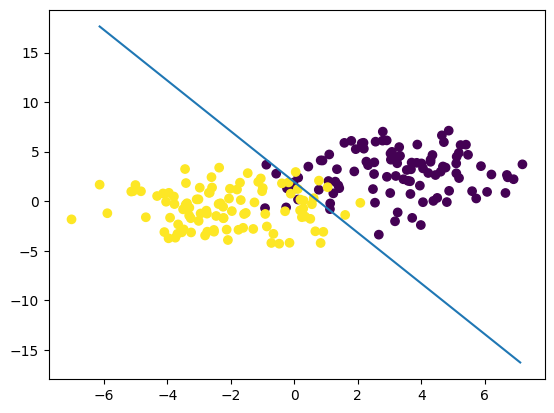

In [183]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.plot(x1,y1)

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
np.round(np.mean(cross_val_score(lr1,x,y,scoring='accuracy',cv=10)),4)

0.915

In [186]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

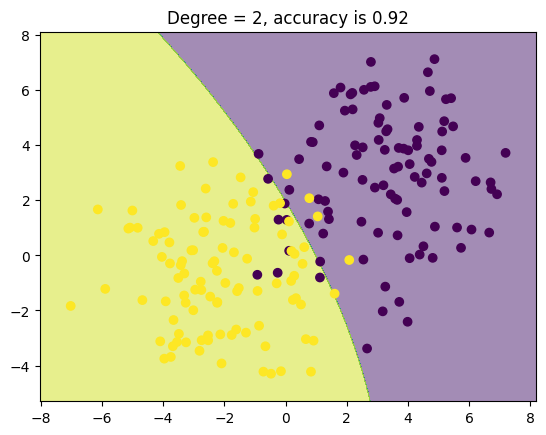

In [187]:
plot_decision_boundary(x,y,degree=2)